In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SP_all_monthly = pd.read_csv('SP_all_monthly.csv')
SP_all_monthly = SP_all_monthly.dropna()

In [3]:
SP_all_monthly['year_month'] = pd.to_datetime(SP_all_monthly.year_month)
SP_all_monthly = SP_all_monthly.sort_values('year_month', ascending=True, ignore_index=True)
SP_all_monthly['Year'] = SP_all_monthly['year_month'].dt.year
SP_all_monthly['Month'] = SP_all_monthly['year_month'].dt.month 
SP_all_monthly = SP_all_monthly.set_index('year_month')
SP_all_monthly

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return(%),t+1_return_class,t_3m_Close,...,Nk_Close,Nk_Volume,fx_Price,fx_change%,vo_Open,vo_Close,Div_Ratio,CS_Index,Year,Month
year_month,,,,,,,,,,,,,,,,,,,,,
1985-02-01,179.63,181.18,2.194620e+09,179.63,0.862885,1,180.66,-0.287007,1.0,8.190,...,12321.919922,0,1.3835,4.24,24.870001,21.990000,21.29,93.7,1985,2
1985-03-01,181.18,180.66,2.153090e+09,181.18,-0.287007,1,179.83,-0.459427,1.0,8.660,...,12580.759766,0,1.3675,-1.16,24.870001,21.990000,21.33,93.7,1985,3
1985-04-01,180.66,179.83,1.981880e+09,180.66,-0.459427,1,189.55,5.405105,2.0,8.150,...,12426.290039,0,1.3670,-0.04,24.870001,21.990000,21.30,94.6,1985,4
1985-05-01,179.83,189.55,2.350340e+09,179.83,5.405105,2,191.85,1.213400,1.0,7.750,...,12758.459961,0,1.3745,0.55,24.870001,21.990000,21.30,91.8,1985,5
1985-06-01,189.55,191.85,2.117000e+09,189.55,1.213400,1,190.92,-0.484754,1.0,7.750,...,12882.089844,0,1.3592,-1.11,24.870001,21.990000,21.31,96.5,1985,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,4540.32,4131.93,7.478485e+10,4530.41,-8.795672,0,4132.15,0.005324,1.0,0.500,...,26847.900391,1345900000,1.2856,2.86,20.620001,33.400002,64.21,65.2,2022,4
2022-05-01,4130.61,4132.15,8.912813e+10,4131.93,0.005324,1,3785.38,-8.391999,0.0,0.500,...,27279.800781,1582900000,1.2644,-1.65,33.349998,26.190001,64.20,58.4,2022,5
2022-06-01,4149.78,3785.38,8.679906e+10,4132.15,-8.391999,0,4130.29,9.111635,2.0,1.103,...,26393.039063,1637700000,1.2872,1.80,26.049999,28.709999,64.01,50.0,2022,6


In [4]:
SP_all_monthly['R_Change%'] = (SP_all_monthly['R_Close'] - SP_all_monthly['R_Open'])/SP_all_monthly['R_Close'].shift(1) 
SP_all_monthly['G_Change%'] = (SP_all_monthly['G_Close'] - SP_all_monthly['G_Open'])/SP_all_monthly['G_Close'].shift(1)
SP_all_monthly['GF_Change%'] = (SP_all_monthly['GF_Close'] - SP_all_monthly['GF_Open'])/SP_all_monthly['GF_Close'].shift(1)
SP_all_monthly['Nas_Change%'] = (SP_all_monthly['Nas_Close'] - SP_all_monthly['Nas_Open'])/SP_all_monthly['Nas_Close'].shift(1)
SP_all_monthly['Nk_Change%'] = (SP_all_monthly['Nk_Close'] - SP_all_monthly['Nk_Open'])/SP_all_monthly['Nk_Close'].shift(1) 
SP_all_monthly['Vo_Change%'] = (SP_all_monthly['vo_Close'] - SP_all_monthly['vo_Open'])/SP_all_monthly['vo_Close'].shift(1) 

In [5]:
SP_all_monthly = SP_all_monthly.drop(['G_Open','G_Close','G_Volume','G_Change%','GF_Open','GF_Close','GF_Volume','GF_Change%'], axis=1)
#SP_all_monthly = SP_all_monthly.drop(['R_Close','R_Open','Nas_Close','Nas_Open',
#                     'Nk_Close','Nk_Open','vo_Close','vo_Open'],axis=1)

## Exploratory Data Analysis

In [6]:
# Let's try with only after 1986 data 
SP_all_monthly = SP_all_monthly[SP_all_monthly.index >= '2000-02-01']

In [7]:
SP_all_monthly.shape

(271, 39)

In [8]:
SP_all_monthly['return_class'].value_counts(1)

1    0.560886
2    0.258303
0    0.180812
Name: return_class, dtype: float64

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,
         4.,  6.,  3.,  3.,  3.,  5.,  4.,  3.,  3.,  5.,  8.,  7., 20.,
         8.,  9., 16., 18., 23., 23., 17., 13., 19.,  9.,  4.,  8.,  5.,
         2.,  4.,  4.,  2.,  4.,  2.,  0.,  2.,  0.,  0.,  1.]),
 array([-16.94245344, -16.34991617, -15.7573789 , -15.16484162,
        -14.57230435, -13.97976707, -13.3872298 , -12.79469252,
        -12.20215525, -11.60961797, -11.0170807 , -10.42454342,
         -9.83200615,  -9.23946887,  -8.6469316 ,  -8.05439432,
         -7.46185705,  -6.86931977,  -6.2767825 ,  -5.68424522,
         -5.09170795,  -4.49917067,  -3.9066334 ,  -3.31409613,
         -2.72155885,  -2.12902158,  -1.5364843 ,  -0.94394703,
         -0.35140975,   0.24112752,   0.8336648 ,   1.42620207,
          2.01873935,   2.61127662,   3.2038139 ,   3.79635117,
          4.38888845,   4.98142572,   5.573963  ,   6.16650027,
          6.75903755,   7.35157482,   7.9441121 ,   8.53664937,
          9.

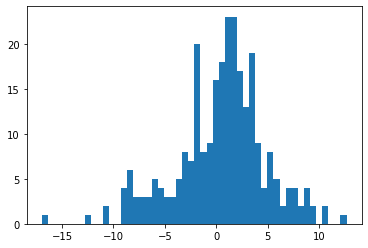

In [9]:
plt.hist(SP_all_monthly['return(%)'], bins = 50)

In [10]:
#Let's check the outliers
SP_all_monthly.loc[SP_all_monthly['return(%)'] <= -10]

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return(%),t+1_return_class,t_3m_Close,...,vo_Open,vo_Close,Div_Ratio,CS_Index,Year,Month,R_Change%,Nas_Change%,Nk_Change%,Vo_Change%
year_month,,,,,,,,,,,,,,,,,,,,,
2002-09-01,916.07,815.28,2.772371e+10,916.07,-11.002434,0,885.76,8.644883,2.0,1.642,...,37.119999,39.689999,25.86,86.1,2002,9,-0.073383,-0.099335,-0.018880,0.078738
2008-10-01,1164.17,968.75,1.598230e+11,1166.36,-16.942453,0,896.24,-7.484903,0.0,0.800,...,39.389999,59.889999,39.26,57.6,2008,10,-0.204082,-0.169298,-0.250414,0.520437
2009-02-01,823.09,735.09,1.244922e+11,825.88,-10.993122,0,797.87,8.540451,2.0,0.010,...,49.419998,46.349998,38.58,56.3,2009,2,-0.117670,-0.056224,-0.042543,-0.068466
2020-03-01,2974.28,2584.59,1.618011e+11,2954.22,-12.511932,0,2912.43,12.684410,2.0,1.485,...,38.540001,53.540001,68.39,89.1,2020,3,-0.219103,-0.112875,-0.091415,0.373972


In [11]:
SP_all_monthly.loc[SP_all_monthly['return(%)'] >= 10]

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return(%),t+1_return_class,t_3m_Close,...,vo_Open,vo_Close,Div_Ratio,CS_Index,Year,Month,R_Change%,Nas_Change%,Nk_Change%,Vo_Change%
year_month,,,,,,,,,,,,,,,,,,,,,
2011-10-01,1131.21,1253.30,9.806367e+10,1131.42,10.772304,2,1246.96,-0.505865,1.0,0.010,...,44.250000,29.959999,33.49,60.8,2011,10,0.157306,0.117256,0.048321,-0.332635
2020-04-01,2498.08,2912.43,1.231634e+11,2584.59,12.684410,2,3044.31,4.528178,2.0,0.063,...,57.380001,34.150002,68.89,71.8,2020,4,0.158642,0.185718,0.079694,-0.433881
2020-11-01,3296.20,3621.63,1.009779e+11,3269.96,10.754566,2,3756.07,3.712141,2.0,0.083,...,38.570000,20.570000,66.57,76.9,2020,11,0.181322,0.108902,0.144617,-0.473435


1987 Oct - Black Monday
1998 Aug - Russian Financial crisis
2002 Sep - .com bubble burst
2008 Oct/2009 Feb - US Financial crisis
2020 Mar - Covid 
There is always a market crash at some point after rapid recovery from recessions 

In [12]:
SP_all_monthly[SP_all_monthly['return_class']==2].describe()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return(%),t+1_return_class,t_3m_Close,...,vo_Open,vo_Close,Div_Ratio,CS_Index,Year,Month,R_Change%,Nas_Change%,Nk_Change%,Vo_Change%
count,70.000000,70.000000,7.000000e+01,70.000000,70.000000,70.0,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,1850.083000,1950.113857,7.279466e+10,1849.316857,5.474419,2.0,1949.165429,0.325350,1.042857,1.209314,...,23.692143,19.306429,43.618429,81.684286,2011.571429,6.528571,0.058553,0.064187,0.036164,-0.160208
std,1013.929894,1068.396258,3.050955e+10,1010.926184,2.225923,0.0,1051.032879,3.580557,0.646859,1.698130,...,9.418099,6.631729,15.000496,12.513455,6.610425,3.541560,0.041009,0.040392,0.040322,0.144620
min,729.570000,797.870000,2.036370e+10,735.090000,3.026322,2.0,872.810000,-9.229069,0.000000,0.007000,...,10.950000,11.100000,25.970000,51.500000,2000.000000,1.000000,-0.066850,-0.034064,-0.069171,-0.473435
25%,1112.597500,1170.527500,5.722678e+10,1112.597500,3.620091,2.0,1181.767500,-1.444090,1.000000,0.080750,...,16.687500,13.592500,30.517500,72.675000,2007.000000,3.000000,0.028163,0.039385,0.010877,-0.279946
50%,1393.625000,1490.240000,7.154210e+10,1393.640000,4.850440,2.0,1444.470000,0.703034,1.000000,0.187500,...,21.640000,17.875000,37.030000,82.050000,2011.500000,7.000000,0.055494,0.057825,0.033352,-0.175819
75%,2492.800000,2788.242500,8.922714e+10,2565.155000,6.889210,2.0,2742.502500,2.845472,1.000000,1.838500,...,27.832500,23.650001,60.090000,92.475000,2018.000000,10.000000,0.078572,0.086863,0.064963,-0.053679
max,4602.820000,4766.180000,1.618436e+11,4567.000000,12.684410,2.0,4567.000000,9.392508,2.000000,6.060000,...,57.380001,44.139999,68.930000,107.300000,2022.000000,12.000000,0.181322,0.185718,0.144617,0.234601


In [13]:
SP_all_monthly[SP_all_monthly['return_class']==1].describe()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return(%),t+1_return_class,t_3m_Close,...,vo_Open,vo_Close,Div_Ratio,CS_Index,Year,Month,R_Change%,Nas_Change%,Nk_Change%,Vo_Change%
count,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.0,152.000000,152.000000,152.000000,152.000000,...,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1801.269737,1809.673947,6.302423e+10,1799.833355,0.437204,1.0,1821.910263,0.608101,1.092105,1.529579,...,17.930526,17.730724,42.540329,86.778947,2010.677632,6.605263,0.008719,0.006571,0.006520,0.007690
std,823.439094,832.014812,2.464095e+10,821.212869,1.595282,0.0,844.155713,4.045489,0.644439,1.731665,...,6.761984,5.884142,13.395368,10.962402,6.258877,3.387077,0.036152,0.037900,0.043834,0.169726
min,841.150000,841.150000,1.908910e+10,841.150000,-2.766577,1.0,815.280000,-11.002434,0.000000,0.003000,...,9.590000,9.510000,26.040000,58.400000,2000.000000,1.000000,-0.066956,-0.137093,-0.099027,-0.370297
25%,1227.712500,1218.055000,4.196160e+10,1227.702500,-0.874173,1.0,1216.975000,-1.713527,1.000000,0.068750,...,13.397500,13.495000,30.877500,79.675000,2005.000000,4.000000,-0.015795,-0.014727,-0.014998,-0.098753
50%,1428.560000,1427.795000,6.946104e+10,1428.555000,0.700863,1.0,1439.455000,1.219977,1.000000,0.927000,...,16.330000,16.255000,38.610000,88.950000,2011.000000,6.000000,0.008297,0.006899,0.003666,-0.013148
75%,2166.080000,2136.680000,7.808951e+10,2168.940000,1.789433,1.0,2169.602500,3.162017,2.000000,2.277500,...,20.959999,20.122500,55.182500,94.775000,2016.000000,9.250000,0.029252,0.027527,0.032354,0.083594
max,4610.620000,4567.000000,1.310440e+11,4605.380000,2.995202,1.0,4766.180000,10.754566,2.000000,6.080000,...,60.470001,40.000000,68.590000,111.300000,2022.000000,12.000000,0.164198,0.186689,0.135318,0.635916


In [14]:
SP_all_monthly[SP_all_monthly['return_class']==0].describe()

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return(%),t+1_return_class,t_3m_Close,...,vo_Open,vo_Close,Div_Ratio,CS_Index,Year,Month,R_Change%,Nas_Change%,Nk_Change%,Vo_Change%
count,49.000000,49.000000,4.900000e+01,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1945.435510,1820.906531,7.569735e+10,1943.172245,-6.503266,0.0,1836.176735,0.339300,1.081633,1.703429,...,23.526530,29.199388,42.427143,80.475510,2010.510204,5.918367,-0.075948,-0.087846,-0.059479,0.292088
std,1154.457758,1087.291283,3.680958e+10,1151.507160,2.814192,0.0,1121.633355,6.254611,0.731344,1.812705,...,9.736762,10.017231,14.976392,16.210292,7.300464,3.457099,0.044869,0.045916,0.050971,0.287341
min,823.090000,735.090000,2.010646e+10,825.880000,-16.942453,0.0,735.090000,-16.942453,0.000000,0.003000,...,11.830000,15.320000,25.860000,50.000000,2000.000000,1.000000,-0.219103,-0.223513,-0.250414,-0.125206
25%,1147.390000,1076.920000,4.222872e+10,1147.390000,-8.197592,0.0,1067.140000,-2.741470,1.000000,0.100000,...,17.270000,23.139999,29.390000,68.900000,2004.000000,2.000000,-0.097207,-0.112875,-0.091415,0.126808
50%,1399.620000,1314.950000,7.853613e+10,1400.380000,-6.258080,0.0,1322.700000,0.008661,1.000000,1.397000,...,22.389999,26.200001,38.880000,81.200000,2010.000000,6.000000,-0.071920,-0.079313,-0.068315,0.233547
75%,2790.500000,2506.850000,9.240977e+10,2760.170000,-4.244012,0.0,2584.590000,4.311704,2.000000,2.270000,...,25.860001,32.029999,59.070000,92.000000,2018.000000,9.000000,-0.041686,-0.060057,-0.027900,0.419861
max,4778.140000,4515.550000,1.618011e+11,4766.180000,-3.079582,0.0,4605.380000,12.684410,2.000000,6.170000,...,60.169998,59.889999,68.390000,109.200000,2022.000000,12.000000,0.009520,-0.013444,0.045341,1.285479


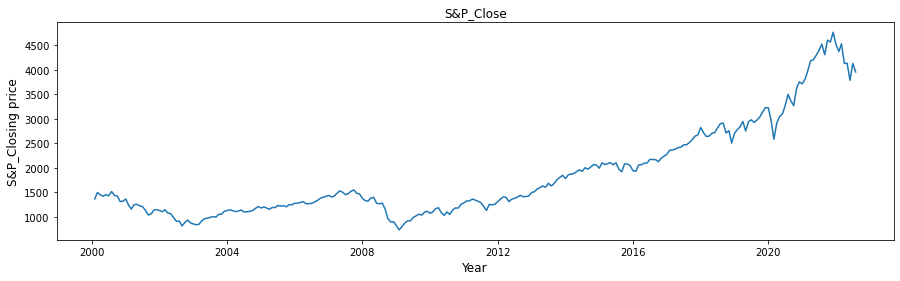

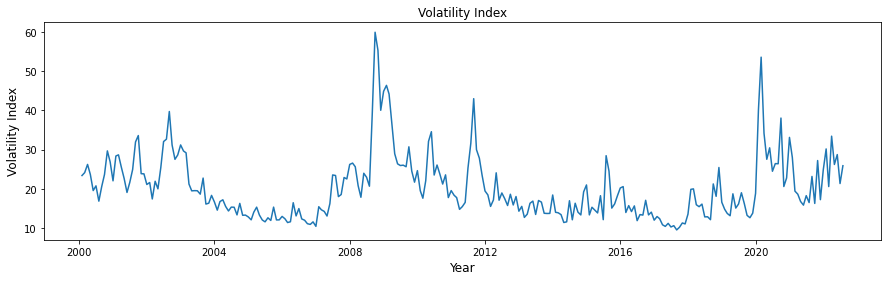

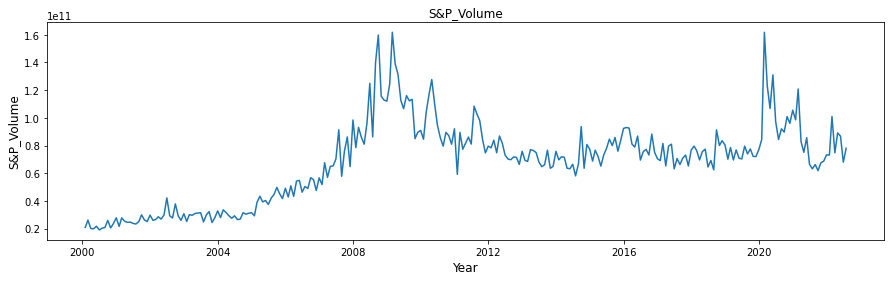

In [15]:
#visualize the data
plt.figure(figsize=(15,4))
plt.title('S&P_Close')
plt.xlabel('Year',fontsize=12)
plt.ylabel('S&P_Closing price',fontsize=12)
plt.plot(SP_all_monthly['S&P_Close'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Volatility Index')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Volatility Index',fontsize=12)
plt.plot(SP_all_monthly['vo_Close'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('S&P_Volume')
plt.xlabel('Year',fontsize=12)
plt.ylabel('S&P_Volume',fontsize=12)
plt.plot(SP_all_monthly['S&P_Volume'])
plt.show()

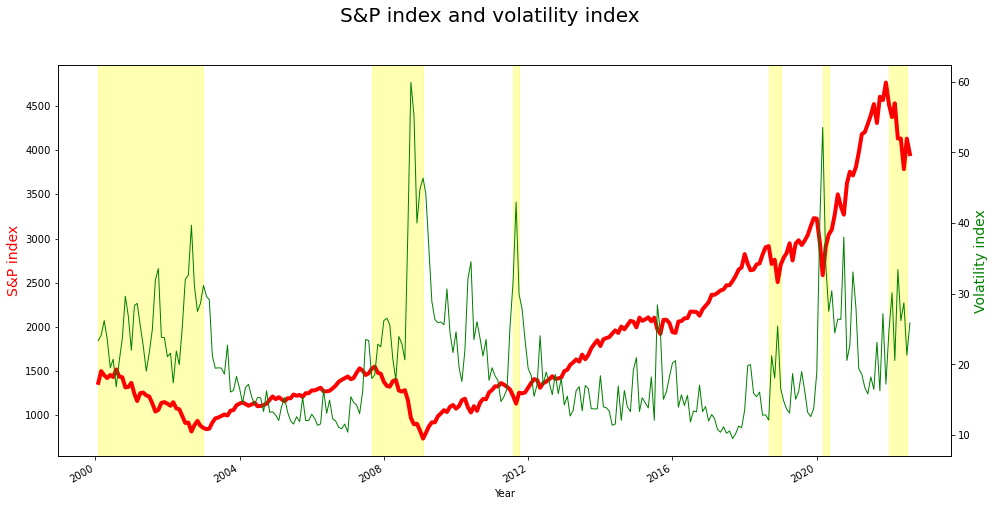

In [16]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

ax1.plot(SP_all_monthly['S&P_Close'], color='red', lw=4)
ax2.plot(SP_all_monthly['vo_Close'], color='green', lw=1)

ax1.set_xlabel("Year")
ax1.set_ylabel("S&P index", color='red', fontsize=14)
ax1.tick_params(axis="y")

ax2.set_ylabel("Volatility index", color='green', fontsize=14)
ax2.tick_params(axis="y")

fig.suptitle("S&P index and volatility index", fontsize=20)
fig.autofmt_xdate()

ax1.axvspan('2000-02-01','2002-12-31',color='yellow', alpha=0.3)
ax1.axvspan('2007-09-01','2009-01-31',color='yellow', alpha=0.3)
ax1.axvspan('2011-08-01','2011-09-30',color='yellow', alpha=0.3)
ax1.axvspan('2018-09-01','2018-12-30',color='yellow', alpha=0.3)
ax1.axvspan('2020-03-01','2020-04-30',color='yellow', alpha=0.3)
ax1.axvspan('2022-01-02','2022-06-30',color='yellow', alpha=0.3)

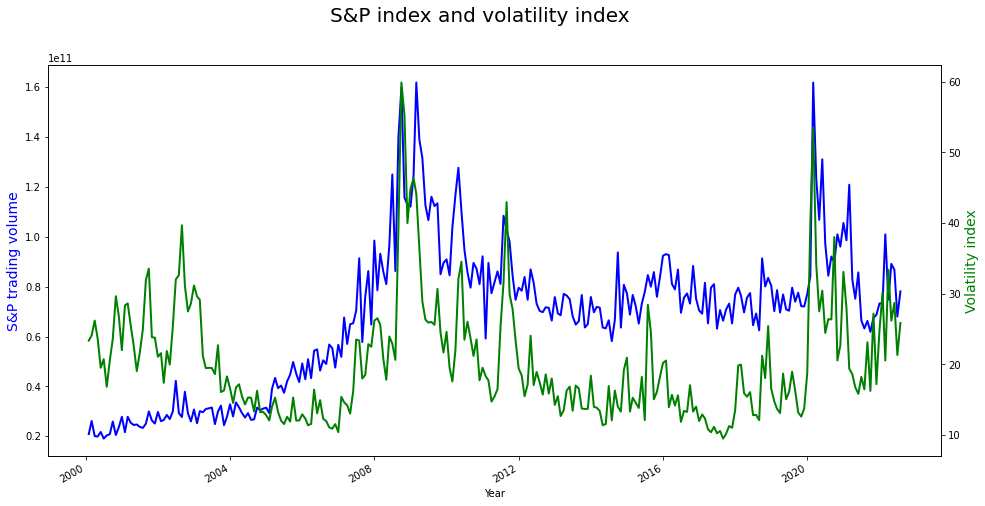

In [17]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

ax1.plot(SP_all_monthly['S&P_Volume'], color='blue', lw=2)
ax2.plot(SP_all_monthly['vo_Close'], color='green', lw=2)

ax1.set_xlabel("Year")
ax1.set_ylabel("S&P trading volume", color='blue', fontsize=14)
ax1.tick_params(axis="y")

ax2.set_ylabel("Volatility index", color='green', fontsize=14)
ax2.tick_params(axis="y")

fig.suptitle("S&P index and volatility index", fontsize=20)
fig.autofmt_xdate()


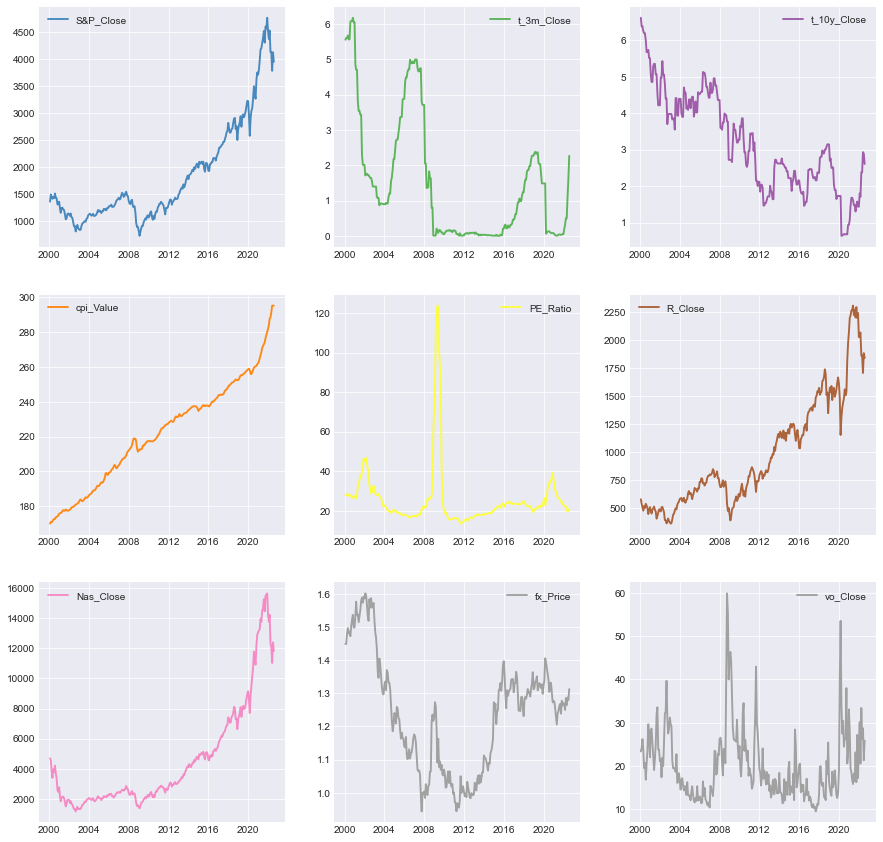

In [18]:
columns = ['S&P_Close','t_3m_Close','t_10y_Close', 'cpi_Value','PE_Ratio', 'R_Close', 'Nas_Close',
           'fx_Price','vo_Close']

plt.figure(figsize=(15,15))
# Initialize the figure style
plt.style.use('seaborn-darkgrid')
# create a color palette
palette = plt.get_cmap('Set1')

num=0
for column in columns:
    num+=1
    # Find the right spot on the plot
    plt.subplot(3,3,num)
    
    # Plot the lineplot
    plt.plot(SP_all_monthly.index, SP_all_monthly[column], color=palette(num), linewidth=1.9, 
             alpha=0.9,label=column)
    plt.legend()


# Show the graph
plt.show()


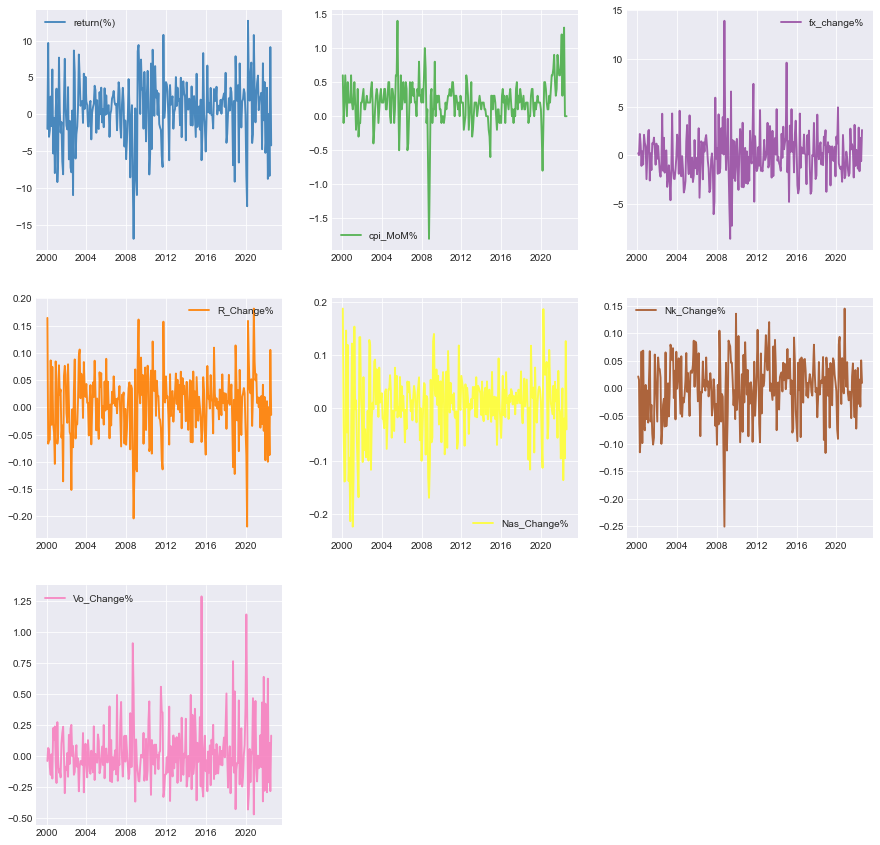

In [19]:
columns = ['return(%)','cpi_MoM%','fx_change%', 'R_Change%', 'Nas_Change%', 
           'Nk_Change%','Vo_Change%']

plt.figure(figsize=(15,15))
# Initialize the figure style
plt.style.use('seaborn-darkgrid')
# create a color palette
palette = plt.get_cmap('Set1')

num=0
for column in columns:
    num+=1
    # Find the right spot on the plot
    plt.subplot(3,3,num)
    
    # Plot the lineplot
    plt.plot(SP_all_monthly.index, SP_all_monthly[column], color=palette(num), linewidth=1.9, 
             alpha=0.9,label=column)
    plt.legend()

# Axis titles
'''plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')'''

# Show the graph
plt.show()


Box plot

Text(0.5, 1.0, 'Treasury bill(3M) rate per return class')

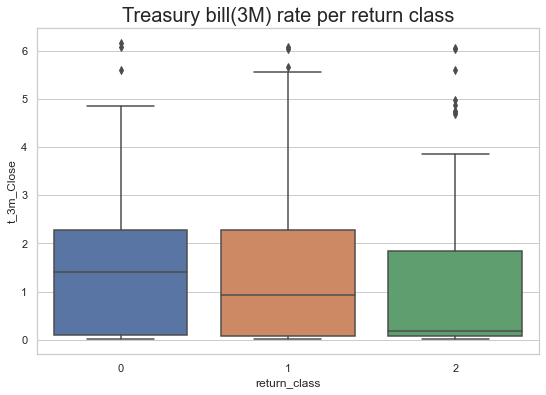

In [20]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='return_class', y='t_3m_Close', data=SP_all_monthly)
ax.set_title('Treasury bill(3M) rate per return class', fontsize = 20)

Text(0.5, 1.0, 'FX change(%) per return class')

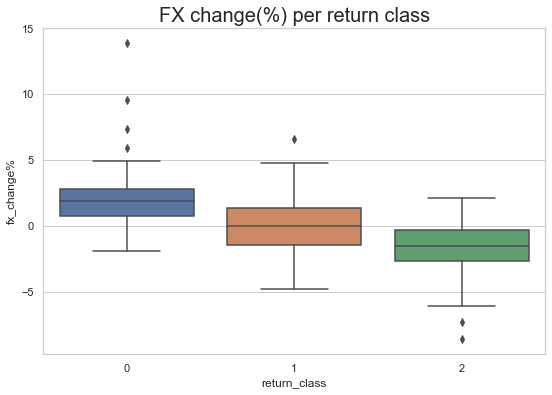

In [21]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='return_class', y='fx_change%', data=SP_all_monthly)
ax.set_title('FX change(%) per return class', fontsize = 20)

Text(0.5, 1.0, 'unemployment rate per return class')

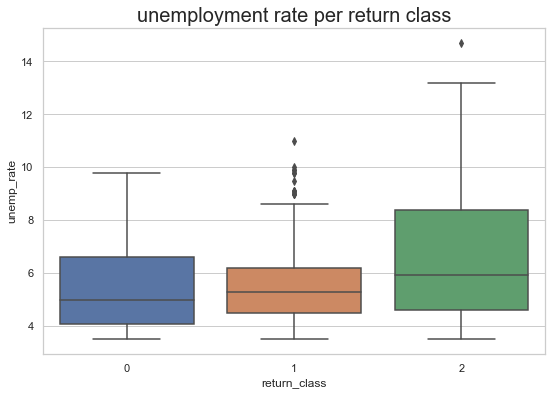

In [22]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='return_class', y='unemp_rate', data=SP_all_monthly)
ax.set_title('unemployment rate per return class', fontsize = 20)

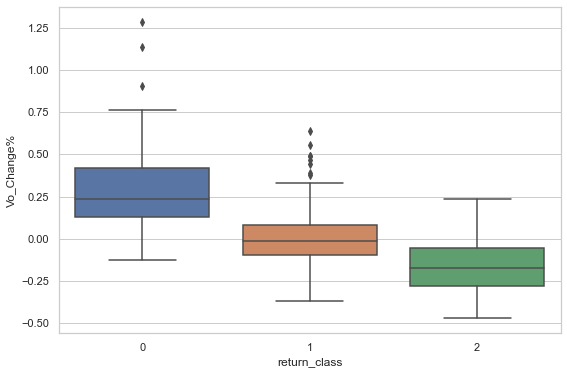

In [23]:
ax = sns.boxplot(x='return_class', y='Vo_Change%', data=SP_all_monthly)

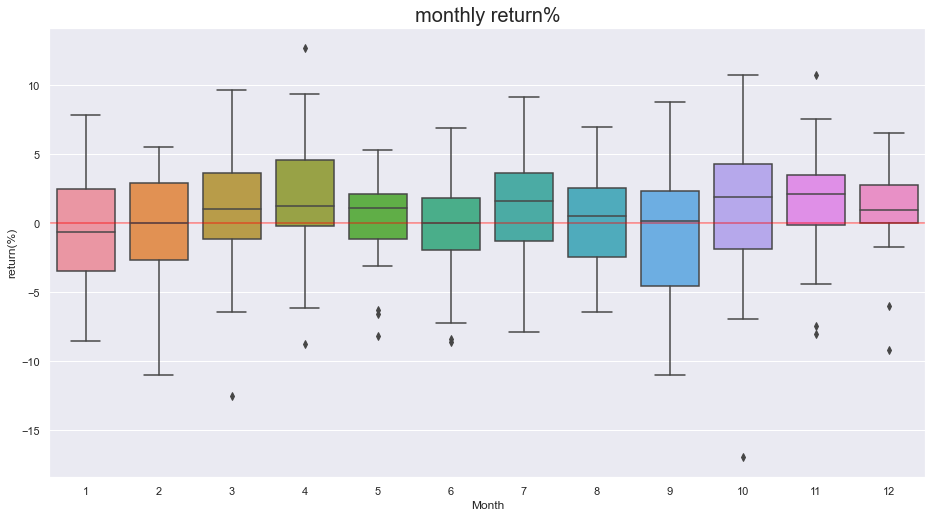

In [24]:
# Monthly S&P index return
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x='Month', y='return(%)', data=SP_all_monthly)
ax.set_title('monthly return%', fontsize=20)
ax.axhline(y=0, color ='red', alpha = 0.5)

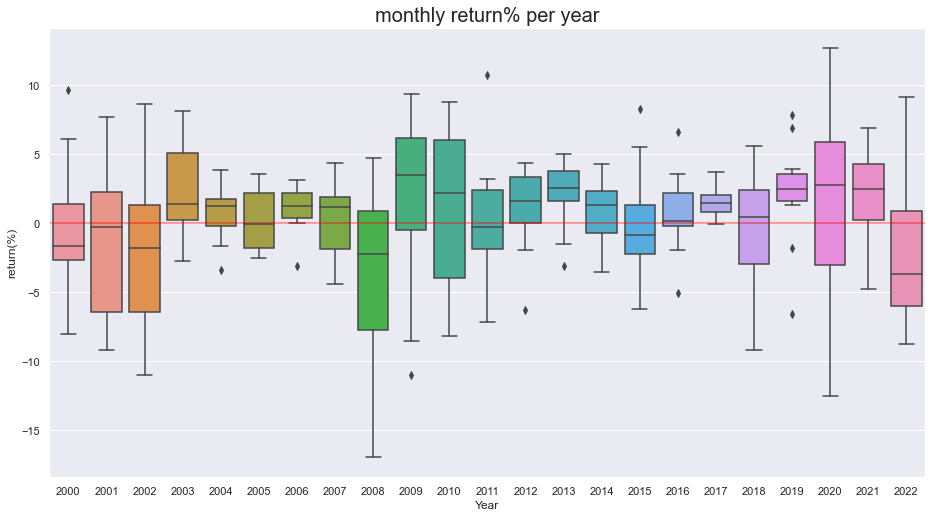

In [25]:
# Monthly S&P Index return per year 
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x='Year', y='return(%)', data=SP_all_monthly)
ax.set_title('monthly return% per year', fontsize=20)
ax.axhline(y=0, color ='red', alpha = 0.5)

August 1982 - October 1987 : annualized return 17.6% 
October 19, 1987 market crash a.k.a. Black Monday
2000 dot-com bubble burst
2008 - 2009 financial crisis 

## First baseline model 

#### modeling

In [26]:
# 1. scaling
# 2. building a model (Logistic Regression, Naive Bayes, Decision Tree/Random Forest, SVM, KNN?)

In [27]:
SP_all_monthly = SP_all_monthly.dropna()
X = SP_all_monthly.drop(['Year','Month','Close_t+1','t+1_return(%)','t+1_return_class'], axis=1)
y = SP_all_monthly['t+1_return_class']

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

In [29]:
# Data Splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.15, random_state=27)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import precision_recall_fscore_support, f1_score, accuracy_score, roc_auc_score

logreg_clf = LogisticRegression(multi_class = 'multinomial', max_iter=200)
LDA_clf = LinearDiscriminantAnalysis()
KNN_clf = KNeighborsClassifier()
NB_clf = GaussianNB()
DT_clf = DecisionTreeClassifier()
SVM_clf = SVC()
xgb_clf = xgb.XGBClassifier()
RF_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [31]:
# Logistic regression
logreg_clf.fit(X_train,y_train)
y_pred = logreg_clf.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
score = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.6585365853658537
Test set precision, recall, f-score: (0.5418589321028345, 0.6585365853658537, 0.5696302124311566, None)


C:\Users\Irene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# LDA 
LDA_clf.fit(X_train,y_train)
y_pred_LDA = LDA_clf.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred_LDA)
score = precision_recall_fscore_support(y_test, y_pred_LDA, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.5853658536585366
Test set precision, recall, f-score: (0.5172256097560975, 0.5853658536585366, 0.5393502518021133, None)


In [35]:
# Naive Bayes
NB_clf.fit(X_train,y_train)
y_pred_NB = NB_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_NB)
score = precision_recall_fscore_support(y_test, y_pred_NB, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.6097560975609756
Test set precision, recall, f-score: (0.5495934959349593, 0.6097560975609756, 0.5580878331088592, None)


In [36]:
# XGBoost
xgb_clf.fit(X_train,y_train)
y_pred_xgb = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
score = precision_recall_fscore_support(y_test, y_pred_xgb, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.6097560975609756
Test set precision, recall, f-score: (0.5894308943089431, 0.6097560975609756, 0.5735228903091171, None)


In [37]:
# Random Forest
RF_clf.fit(X_train,y_train)
y_pred_RF = RF_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_RF)
score = precision_recall_fscore_support(y_test, y_pred_RF, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.5853658536585366
Test set precision, recall, f-score: (0.375234521575985, 0.5853658536585366, 0.4573170731707318, None)


C:\Users\Irene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# SVM
SVM_clf.fit(X_train,y_train)
y_pred_SVM = SVM_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_SVM)
score = precision_recall_fscore_support(y_test, y_pred_SVM, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.6341463414634146
Test set precision, recall, f-score: (0.49307844429795655, 0.6341463414634146, 0.5371098872279045, None)


C:\Users\Irene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature selection

Part 1: Removing Features With Small Variance

In [39]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
X_transformed = vt.fit_transform(X)

In [40]:
# columns we have selected
# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = X.columns[vt.get_support()]
# transforming an array back to a data-frame preserves column labels
X_transformed = pd.DataFrame(X_transformed, columns = selected_columns)

In [41]:
X_transformed

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,t_3m_Close,t_10y_Close,cpi_Value,cpi_MoM%,...,Nas_Close,Nas_Volume,Nk_Open,Nk_Close,Nk_Volume,fx_change%,vo_Open,vo_Close,Div_Ratio,CS_Index
0,1394.46,1366.42,2.091200e+10,1394.46,-2.010814,1.0,5.550,6.617,170.000,0.6,...,4696.689941,3.564470e+10,19536.679688,19959.519531,0.000000e+00,0.21,24.430000,23.370001,29.21,111.3
1,1366.42,1498.58,2.615620e+10,1366.42,9.671990,2.0,5.600,6.379,171.000,-0.1,...,4572.830078,4.320049e+10,20030.080078,20337.320313,0.000000e+00,0.01,22.650000,24.110001,29.01,107.1
2,1498.58,1452.43,2.010646e+10,1498.58,-3.079582,0.0,5.600,6.379,170.900,0.2,...,3860.659912,3.514797e+10,20327.789063,17973.699219,0.000000e+00,2.20,24.990000,26.200001,28.96,109.2
3,1452.43,1420.60,1.989830e+10,1452.43,-2.191500,1.0,5.670,6.255,171.200,0.6,...,3400.909912,3.083198e+10,17979.250000,16332.450195,0.000000e+00,1.07,26.070000,23.650000,28.89,110.7
4,1420.60,1454.60,2.173830e+10,1420.60,2.393355,1.0,5.560,6.195,172.200,0.3,...,3966.110107,3.335238e+10,16320.080078,17411.050781,0.000000e+00,-1.10,23.200001,19.540001,28.71,106.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,4540.32,4131.93,7.478485e+10,4530.41,-8.795672,0.0,0.500,2.377,288.663,1.0,...,12334.639648,9.599430e+10,27624.109375,26847.900391,1.345900e+09,2.86,20.620001,33.400002,64.21,65.2
267,4130.61,4132.15,8.912813e+10,4131.93,0.005324,1.0,0.500,2.377,291.474,1.3,...,12081.389648,1.109477e+11,26851.099609,27279.800781,1.582900e+09,-1.65,33.349998,26.190001,64.20,58.4
268,4149.78,3785.38,8.679906e+10,4132.15,-8.391999,0.0,1.103,2.931,295.328,0.0,...,11028.740234,1.133446e+11,27295.630859,26393.039063,1.637700e+09,1.80,26.049999,28.709999,64.01,50.0
269,3781.00,4130.29,6.802114e+10,3785.38,9.111635,2.0,1.603,2.889,295.271,0.0,...,12390.690430,9.361941e+10,26460.710938,27801.640625,1.339300e+09,-0.61,29.530001,21.330000,64.01,51.5


In [42]:
X

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,t_3m_Close,t_10y_Close,cpi_Value,cpi_MoM%,...,fx_Price,fx_change%,vo_Open,vo_Close,Div_Ratio,CS_Index,R_Change%,Nas_Change%,Nk_Change%,Vo_Change%
year_month,,,,,,,,,,,,,,,,,,,,,
2000-02-01,1394.46,1366.42,2.091200e+10,1394.46,-2.010814,1,5.550,6.617,170.000,0.6,...,1.4489,0.21,24.430000,23.370001,29.21,111.3,0.164198,0.186689,0.021640,-0.042485
2000-03-01,1366.42,1498.58,2.615620e+10,1366.42,9.671990,2,5.600,6.379,171.000,-0.1,...,1.4491,0.01,22.650000,24.110001,29.01,107.1,-0.066850,-0.034064,0.015393,0.062473
2000-04-01,1498.58,1452.43,2.010646e+10,1498.58,-3.079582,0,5.600,6.379,170.900,0.2,...,1.4810,2.20,24.990000,26.200001,28.96,109.2,-0.060788,-0.138695,-0.115752,0.050187
2000-05-01,1452.43,1420.60,1.989830e+10,1452.43,-2.191500,1,5.670,6.255,171.200,0.6,...,1.4968,1.07,26.070000,23.650000,28.89,110.7,-0.059398,-0.137093,-0.091623,-0.092366
2000-06-01,1420.60,1454.60,2.173830e+10,1420.60,2.393355,1,5.560,6.195,172.200,0.3,...,1.4804,-1.10,23.200001,19.540001,28.71,106.4,0.086207,0.145302,0.066798,-0.154757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,4540.32,4131.93,7.478485e+10,4530.41,-8.795672,0,0.500,2.377,288.663,1.0,...,1.2856,2.86,20.620001,33.400002,64.21,65.2,-0.100052,-0.136063,-0.027900,0.621595
2022-05-01,4130.61,4132.15,8.912813e+10,4131.93,0.005324,1,0.500,2.377,291.474,1.3,...,1.2644,-1.65,33.349998,26.190001,64.20,58.4,0.000204,-0.020293,0.015968,-0.214371
2022-06-01,4149.78,3785.38,8.679906e+10,4132.15,-8.391999,0,1.103,2.931,295.328,0.0,...,1.2872,1.80,26.049999,28.709999,64.01,50.0,-0.087697,-0.095035,-0.033086,0.101565


Part 2: Removing Correlated Features

In [43]:
# step 1
X_corr = X_transformed.corr().abs()

# step 2
indices = np.where(X_corr > 0.9) 
indices = [(X_corr.index[x], X_corr.columns[y]) 
for x, y in zip(*indices)
    if x != y and x < y]

# step 3
for idx in indices: #each pair
    try:
        X_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [44]:
print(indices)

[('S&P_Open', 'S&P_Close'), ('S&P_Open', 'Close_t-1'), ('S&P_Open', 'R_Open'), ('S&P_Open', 'R_Close'), ('S&P_Open', 'Nas_Open'), ('S&P_Open', 'Nas_Close'), ('S&P_Open', 'Nk_Open'), ('S&P_Open', 'Nk_Close'), ('S&P_Close', 'Close_t-1'), ('S&P_Close', 'R_Open'), ('S&P_Close', 'R_Close'), ('S&P_Close', 'Nas_Open'), ('S&P_Close', 'Nas_Close'), ('S&P_Close', 'Nk_Open'), ('S&P_Close', 'Nk_Close'), ('S&P_Volume', 'R_Volume'), ('Close_t-1', 'R_Open'), ('Close_t-1', 'R_Close'), ('Close_t-1', 'Nas_Open'), ('Close_t-1', 'Nas_Close'), ('Close_t-1', 'Nk_Open'), ('Close_t-1', 'Nk_Close'), ('cpi_Value', 'R_Open'), ('cpi_Value', 'R_Close'), ('cpi_Value', 'Div_Ratio'), ('R_Open', 'R_Close'), ('R_Open', 'Nas_Open'), ('R_Open', 'Nas_Close'), ('R_Open', 'Div_Ratio'), ('R_Close', 'Nas_Open'), ('R_Close', 'Nas_Close'), ('R_Close', 'Nk_Close'), ('R_Close', 'Div_Ratio'), ('Nas_Open', 'Nas_Close'), ('Nas_Open', 'Nk_Open'), ('Nas_Open', 'Nk_Close'), ('Nas_Close', 'Nk_Close'), ('Nk_Open', 'Nk_Close')]


In [45]:
X_transformed

,S&P_Open,S&P_Volume,return(%),return_class,t_3m_Close,t_10y_Close,cpi_Value,cpi_MoM%,oil_Price,unemp_rate,PE_Ratio,EY_Ratio,Nas_Volume,Nk_Volume,fx_change%,vo_Open,vo_Close,CS_Index
0,1394.46,2.091200e+10,-2.010814,1.0,5.550,6.617,170.000,0.6,29.366000,4.1,27.76,3.60,3.564470e+10,0.000000e+00,0.21,24.430000,23.370001,111.3
1,1366.42,2.615620e+10,9.671990,2.0,5.600,6.379,171.000,-0.1,29.841739,4.0,28.31,3.53,4.320049e+10,0.000000e+00,0.01,22.650000,24.110001,107.1
2,1498.58,2.010646e+10,-3.079582,0.0,5.600,6.379,170.900,0.2,25.722105,3.8,28.50,3.51,3.514797e+10,0.000000e+00,2.20,24.990000,26.200001,109.2
3,1452.43,1.989830e+10,-2.191500,1.0,5.670,6.255,171.200,0.6,28.788182,4.0,27.49,3.64,3.083198e+10,0.000000e+00,1.07,26.070000,23.650000,110.7
4,1420.60,2.173830e+10,2.393355,1.0,5.560,6.195,172.200,0.3,31.822273,4.0,28.16,3.55,3.335238e+10,0.000000e+00,-1.10,23.200001,19.540001,106.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,4540.32,7.478485e+10,-8.795672,0.0,0.500,2.377,288.663,1.0,101.777500,3.6,22.19,4.51,9.599430e+10,1.345900e+09,2.86,20.620001,33.400002,65.2
267,4130.61,8.912813e+10,0.005324,1.0,0.500,2.377,291.474,1.3,109.552381,3.6,20.42,4.90,1.109477e+11,1.582900e+09,-1.65,33.349998,26.190001,58.4
268,4149.78,8.679906e+10,-8.391999,0.0,1.103,2.931,295.328,0.0,114.837143,3.6,19.70,5.08,1.133446e+11,1.637700e+09,1.80,26.049999,28.709999,50.0
269,3781.00,6.802114e+10,9.111635,2.0,1.603,2.889,295.271,0.0,101.619000,3.5,19.77,5.06,9.361941e+10,1.339300e+09,-0.61,29.530001,21.330000,51.5


### Second modeling

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=27) #shuffle=False 

In [48]:
logreg_clf = LogisticRegression(multi_class = 'multinomial')
LDA_clf = LinearDiscriminantAnalysis() 
KNN_clf = KNeighborsClassifier()
NB_clf = GaussianNB()
DT_clf = DecisionTreeClassifier()
SVM_clf = SVC(probability=True)
xgb_clf = xgb.XGBClassifier()
RF_clf = RandomForestClassifier(max_depth=5, random_state=27)

In [49]:
# Logistic regression

logreg_clf = LogisticRegression(multi_class = 'multinomial')
LDA_clf = LinearDiscriminantAnalysis() 
KNN_clf = KNeighborsClassifier()
NB_clf = GaussianNB()
DT_clf = DecisionTreeClassifier()
SVM_clf = SVC(probability=True)
xgb_clf = xgb.XGBClassifier()
RF_clf = RandomForestClassifier(max_depth=5, random_state=27)
logreg_clf.fit(X_train,y_train)
y_pred = logreg_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#score = precision_recall_fscore_support(y_test, y_pred, average='weighted')
roc_score = roc_auc_score(y_test, logreg_clf.predict_proba(X_test), multi_class='ovr')
print(f'accuracy score: {accuracy}')
#print(f'Test set precision, recall, f-score: {score}')
print(f'Test set roc_auc_score: {roc_score}')

accuracy score: 0.6829268292682927
Test set roc_auc_score: 0.7038131313131313


In [50]:
# LDA 

LDA_clf.fit(X_train,y_train)
y_pred_LDA = LDA_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_LDA)
#score = precision_recall_fscore_support(y_test, y_pred_LDA, average='weighted')
roc_score = roc_auc_score(y_test, LDA_clf.predict_proba(X_test), multi_class='ovr')
print(f'accuracy score: {accuracy}')
#print(f'Test set precision, recall, f-score: {score}')
print(f'Test set roc_auc_score: {roc_score}')

accuracy score: 0.6585365853658537
Test set roc_auc_score: 0.6765656565656565


In [51]:
# Naive Bayes
NB_clf.fit(X_train,y_train)
y_pred_NB = NB_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_NB)
#score = precision_recall_fscore_support(y_test, y_pred_NB, average='weighted')
roc_score = roc_auc_score(y_test, NB_clf.predict_proba(X_test), multi_class='ovr')
print(f'accuracy score: {accuracy}')
#print(f'Test set precision, recall, f-score: {score}')
print(f'Test set roc_auc_score: {roc_score}')

accuracy score: 0.6341463414634146
Test set roc_auc_score: 0.6496969696969696


In [52]:
# XGBoost
xgb_clf.fit(X_train,y_train)
y_pred_xgb = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
#score = precision_recall_fscore_support(y_test, y_pred_xgb, average='weighted')
roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test), multi_class='ovr')
print(f'accuracy score: {accuracy}')
#print(f'Test set precision, recall, f-score: {score}')
print(f'Test set roc_auc_score: {roc_score}')

accuracy score: 0.6097560975609756
Test set roc_auc_score: 0.6956313131313131


In [53]:
# Random Forest
RF_clf.fit(X_train,y_train)
y_pred_RF = RF_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_RF)
#score = precision_recall_fscore_support(y_test, y_pred_RF, average='weighted')
roc_score = roc_auc_score(y_test, RF_clf.predict_proba(X_test), multi_class='ovr')
print(f'accuracy score: {accuracy}')
#print(f'Test set precision, recall, f-score: {score}')
print(f'Test set roc_auc_score: {roc_score}')

accuracy score: 0.5853658536585366
Test set roc_auc_score: 0.6606565656565656


In [54]:
# SVM
SVM_clf.fit(X_train,y_train)
y_pred_SVM = SVM_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_SVM)
#score = precision_recall_fscore_support(y_test, y_pred_SVM, average='weighted')
roc_score = roc_auc_score(y_test, SVM_clf.predict_proba(X_test), multi_class='ovr')
print(f'accuracy score: {accuracy}')
#print(f'Test set precision, recall, f-score: {score}')
print(f'Test set roc_auc_score: {roc_score}')

accuracy score: 0.6097560975609756
Test set roc_auc_score: 0.6800252525252525
